Simon retrieved COSMOS catalogs from the morphology and photometry directories of this site: 

https://irsa.ipac.caltech.edu/data/COSMOS/tables/

and put them on NCSA at `/project/shared/data/COSMOS_catalogs/`

However, at least for star-galaxy separation

From https://arxiv.org/abs/1805.02427

>The dataset on which we train the machine learning (ML)
codes  is  the  weak  lensing  catalog  from  HST  ACS  in  the
COSMOS  field (Leauthaud  et  al.  2007),  as  this  provides  a
largely unbiased measurement of all extended and point-like
sources from DES (albeit the star-galaxy mixture is affected
by the specific position in the sky with respect to the Galactic  plane).  In  particular,  the
MU_CLASS parameter  is  used for  this  reference,  defined  in  the  peak  surface  brightness  -
MAG_AUTO space,  which  in  space-based  imaging  shows  very
distinct loci with respect to the same objects viewed through
the atmosphere. This has been used previously in star-galaxy
separation assessments in, e.g., Crocce et al. (2016) and Aihara et al. (2018).

So let's grab that catalog

Leauthaud  et  al.  2007: https://ui.adsabs.harvard.edu/#abs/2007ApJS..172..219L/abstract

Catalog: https://irsa.ipac.caltech.edu/data/COSMOS/tables/photometry/cosmos_acs_iphot_200709.tbl

Documentation: https://irsa.ipac.caltech.edu/data/COSMOS/gator_docs/cosmos_acs_colDescriptions.html

Do a `wget https://irsa.ipac.caltech.edu/data/COSMOS/tables/photometry/cosmos_acs_iphot_200709.tbl`

In [10]:
import os
import glob
import gzip
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

Reading the COSMOS HST/ACS weak lensing catalog. Note that the HST/ACS weak lensing catalog is a 1.3G text file. The pandas `read_csv` seems the fastest tool to ingest this catalog. I couldn't get the numpy `getfromtxt` to finish. This same cell was also capable of reading the COSMOS HST/ACS morphology catalog using the numpy rather than pandas functions. Let's concentrate on the weak lensing catalog for now.

In [40]:
#datadir_cosmos = '/project/shared/data/COSMOS_catalogs/'
#infile_cosmos = datadir_cosmos + 'cosmos_morphology_2005.tbl'
datadir_cosmos = '/home/kbechtol/DATA/COSMOS_catalogs/'
infile_cosmos = datadir_cosmos + 'cosmos_acs_iphot_200709.tbl'

reader = open(infile_cosmos, 'r')
lines = reader.readlines()
reader.close()

index = 0
while index < 1000:
    if lines[index][0] != '\\':
        break
    index += 1
#print('index', index)
names = np.core.defchararray.strip(lines[index].split('|')[1:-1]).tolist()
#print(names)
dtype = np.core.defchararray.strip(lines[index + 1].split('|')[1:-1])
#dtype = np.where(dtype == 'int', int, float)
dtype = np.where(dtype == 'int', int, float)
#print(dtype)
while index < 1000:
    if not lines[index][0] in ('\\', '|'):
        break
    index += 1
#print('index', index)
#print(lines[index])

print('Reading file...')
# http://akuederle.com/stop-using-numpy-loadtxt
#data_cosmos = np.genfromtxt(infile_cosmos, comments='\\', delimiter=None, skip_header=index, names=names, dtype=dtype)
#data_cosmos = pd.read_csv(infile_cosmos, delimiter='', skiprows=index, names=names)# dtype=dtype)
df_cosmos = pd.read_csv(infile_cosmos, sep='\s+', skiprows=index, names=names, na_values='null')# dtype=dtype)

Reading file...


In [41]:
#lines[index].split()
#data_cosmos['id'][0]
print(df_cosmos.shape)
df_cosmos
#data_morphology.dtype.names

(1177274, 60)


,number,mag_iso,magerr_iso,mag_isocor,magerr_isocor,mag_petro,magerr_petro,petro_radius,mag_aper,magerr_aper,...,cxy_image,elongation,class_star,field,mu_class,x,y,z,spt_ind,cntr
0,7,25.011913,0.037696,24.427568,0.055698,24.419535,0.072279,7.259999,25.088701,0.043149,...,-0.105052,2.493634,0.000160,acs_I_095751+0228_unrot_sci_12.fits,1,-0.860774,0.507116,0.043610,220212312,1
1,8,24.389151,0.025388,24.144999,0.037031,23.661472,0.051026,10.560000,24.335344,0.026037,...,-0.018387,1.150967,0.019758,acs_I_095751+0228_unrot_sci_12.fits,1,-0.860765,0.507144,0.043452,220212312,2
2,10,23.956926,0.018109,23.787031,0.024735,23.604761,0.032705,7.259999,24.030365,0.018158,...,0.007276,1.101711,0.281359,acs_I_095751+0228_unrot_sci_12.fits,1,-0.860767,0.507134,0.043531,220212312,3
3,16,24.887758,0.028632,24.682690,0.040656,24.469540,0.053768,7.259999,24.735888,0.031832,...,0.042768,1.277476,0.087045,acs_I_095751+0228_unrot_sci_12.fits,1,-0.860758,0.507151,0.043511,220212312,4
4,17,20.882307,0.002660,20.873367,0.002704,20.902988,0.002576,3.500000,20.924545,0.002550,...,0.001963,1.025627,0.992961,acs_I_095751+0228_unrot_sci_12.fits,2,-0.860757,0.507149,0.043553,220212312,5
5,21,23.694363,0.017849,23.424170,0.026065,23.275284,0.032172,6.599999,24.432056,0.025409,...,-0.048445,3.646455,0.000417,acs_I_095751+0228_unrot_sci_12.fits,1,-0.860738,0.507186,0.043498,220212312,6
6,22,24.341871,0.024565,24.032614,0.036572,23.578505,0.044696,9.240000,24.491474,0.026328,...,-0.055762,1.864077,0.000318,acs_I_095751+0228_unrot_sci_12.fits,1,-0.860738,0.507187,0.043500,220212312,7
7,23,24.523901,0.029127,24.052286,0.043844,23.714767,0.055619,9.240000,24.854565,0.035715,...,-0.076338,3.112289,0.000172,acs_I_095751+0228_unrot_sci_12.fits,1,-0.860734,0.507197,0.043444,220212312,8
8,24,24.017153,0.014629,23.962391,0.016682,23.968294,0.017766,3.960000,23.976557,0.017275,...,-0.005030,1.023215,0.974392,acs_I_095751+0228_unrot_sci_12.fits,2,-0.860739,0.507179,0.043558,220212312,9
9,25,22.990147,0.013251,22.712029,0.019367,22.541523,0.026930,7.919999,23.851458,0.016373,...,-0.000769,1.249470,0.000487,acs_I_095751+0228_unrot_sci_12.fits,1,-0.860707,0.507288,0.042932,220212312,10


Now let's write out to a more convient format. I had to do a `pip install --user tables`

In [42]:
print(infile_cosmos)
outfile_cosmos = infile_cosmos.replace('.tbl', '.h5')
print(outfile_cosmos)
df_cosmos.to_hdf(outfile_cosmos, 'df')
#help(data_cosmos.to_hdf)

/home/kbechtol/DATA/COSMOS_catalogs/cosmos_acs_iphot_200709.tbl
/home/kbechtol/DATA/COSMOS_catalogs/cosmos_acs_iphot_200709.h5


Now we can just load the HDF5 file.

In [43]:
df_cosmos = pd.read_hdf(outfile_cosmos, 'df')

In [44]:
df_cosmos.columns

Index(['number', 'mag_iso', 'magerr_iso', 'mag_isocor', 'magerr_isocor',
       'mag_petro', 'magerr_petro', 'petro_radius', 'mag_aper', 'magerr_aper',
       'mag_auto', 'magerr_auto', 'mag_best', 'magerr_best', 'flux_auto',
       'fluxerr_auto', 'kron_radius', 'background', 'threshold', 'flux_max',
       'flux_radius', 'isoarea_image', 'x_image', 'y_image', 'xmin_image',
       'ymin_image', 'xmax_image', 'ymax_image', 'xpeak_image', 'ypeak_image',
       'alphapeak_j2000', 'deltapeak_j2000', 'a_image', 'b_image', 'ra', 'dec',
       'theta_image', 'mu_threshold', 'mu_max', 'isoarea_world', 'x_world',
       'y_world', 'a_world', 'b_world', 'theta_world', 'flags', 'fwhm_image',
       'fwhm_world', 'cxx_image', 'cyy_image', 'cxy_image', 'elongation',
       'class_star', 'field', 'mu_class', 'x', 'y', 'z', 'spt_ind', 'cntr'],
      dtype='object')

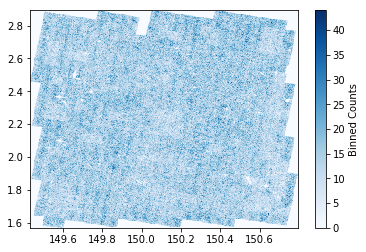

In [45]:
# Sanity check plot
plt.figure()
#plt.scatter(df_cosmos['ra'], df_cosmos['dec'], marker='.', s=1)
plt.hist2d(df_cosmos['ra'], df_cosmos['dec'], bins=(300, 300), cmap='Blues')
plt.colorbar(label='Binned Counts')
plt.show()

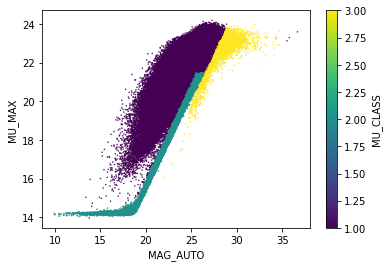

In [49]:
# Sanity check plot
plt.figure()
plt.scatter(df_cosmos['mag_auto'], df_cosmos['mu_max'], c=df_cosmos['mu_class'], marker='.', s=1)
#plt.hist2d(df_cosmos['mag_auto'], df_cosmos['dec'], bins=(300, 300), cmap='Blues')
plt.colorbar(label='MU_CLASS')
plt.xlabel('MAG_AUTO')
plt.ylabel('MU_MAX')
plt.show()

In [50]:
df_cosmos['mag_auto'].dtype

KeyError: 'MAG_AUTO'

Reading the COSMOS photometry catalogs

In [108]:
infiles_cosmos = sorted(glob.glob(datadir_cosmos + 'cosmos_phot_20081101_*.tbl.gz'))
print(infiles_cosmos)

for infile in infiles_cosmos:
    reader = gzip.open(infile)
    lines = reader.readlines()
    reader.close()
    break

['/project/shared/data/COSMOS_catalogs/cosmos_phot_20081101_1.tbl.gz', '/project/shared/data/COSMOS_catalogs/cosmos_phot_20081101_2.tbl.gz', '/project/shared/data/COSMOS_catalogs/cosmos_phot_20081101_3.tbl.gz', '/project/shared/data/COSMOS_catalogs/cosmos_phot_20081101_4.tbl.gz', '/project/shared/data/COSMOS_catalogs/cosmos_phot_20081101_5.tbl.gz', '/project/shared/data/COSMOS_catalogs/cosmos_phot_20081101_6.tbl.gz', '/project/shared/data/COSMOS_catalogs/cosmos_phot_20081101_7.tbl.gz']


In [113]:
lines[0]

b'|                                    ID|                               ID_2006|                                  tile|                                    ra|                                   dec|                               pixel_x|                               pixel_y|                                i_fwhm|                                 i_max|                                i_star|                                i_auto|                           auto_offset|                             auto_flag|                                     u|                                    du|                                     B|                                    dB|                                     V|                                    dV|                                     g|                                    dg|                                     r|                                    dr|                                     i|                                    di|                      